In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set aesthetic style for plots
sns.set_style("whitegrid")
# Load the dataset
# Data available at: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
# Direct download link for the .csv:
data_url = "/content/Wholesale customers data.csv"
df = pd.read_csv(data_url)

In [ ]:
# Display the first few rows of the dataset
print("Dataset Head:")
print(df.head())

Dataset Head:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
# Display general information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Number of duplicate rows: 0


In [ ]:
# Drop duplicates if any (though this dataset is clean)
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {len(df)}")

Number of rows after dropping duplicates: 440


In [ ]:
# Select features for clustering (the spending categories)
features_for_clustering = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features_for_clustering]

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

In [ ]:
print("\nScaled Data Head:")
print(X_scaled_df.head())
print("\nScaled Data Description:")
print(X_scaled_df.describe())


Scaled Data Head:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347

Scaled Data Description:
              Fresh        Milk       Grocery        Frozen  Detergents_Paper  \
count  4.400000e+02  440.000000  4.400000e+02  4.400000e+02      4.400000e+02   
mean  -3.431598e-17    0.000000 -4.037175e-17  3.633457e-17      2.422305e-17   
std    1.001138e+00    1.001138  1.001138e+00  1.001138e+00      1.001138e+00   
min   -9.496831e-01   -0.778795 -8.373344e-01 -6.283430e-01     -6.044165e-01   
25%   -7.023339e-01   -0.578306 -6.108364e-01 -4.804306e-01     -5.511349e-01   
50%   -2.767602e-01   -0.294258 -3.36

In [ ]:
# Descriptive statistics of the original data
print("\nDescriptive Statistics of Original Data:")
print(df[features_for_clustering].describe())


Descriptive Statistics of Original Data:
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


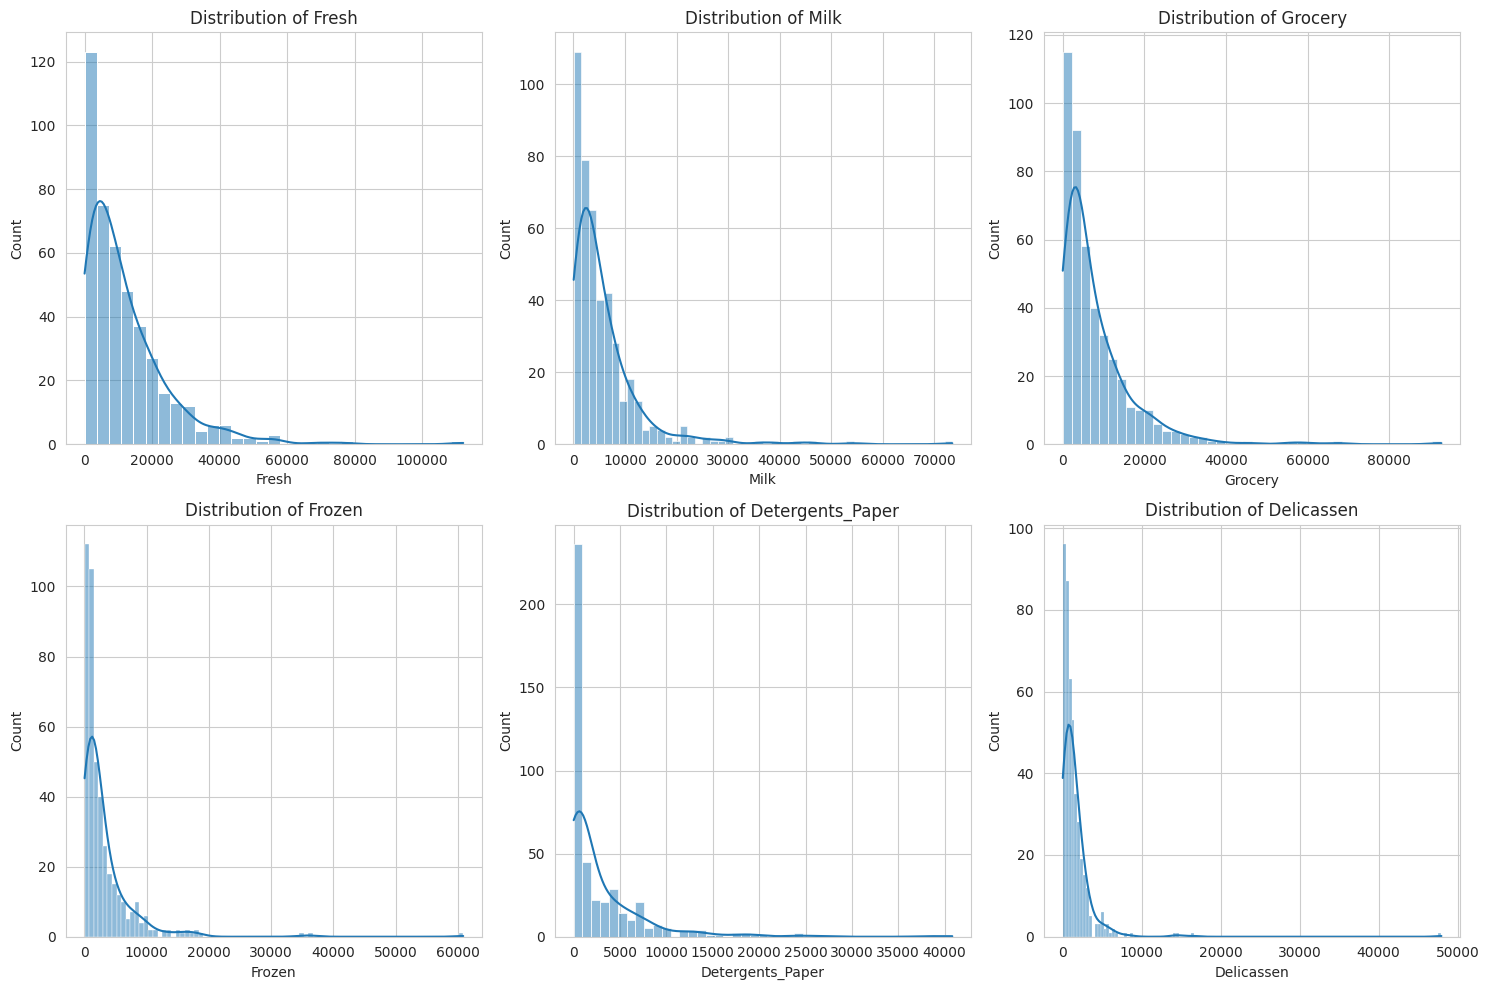

In [ ]:
# Visualize distributions of individual features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering):
 plt.subplot(2, 3, i + 1)
 sns.histplot(df[feature], kde=True)
 plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

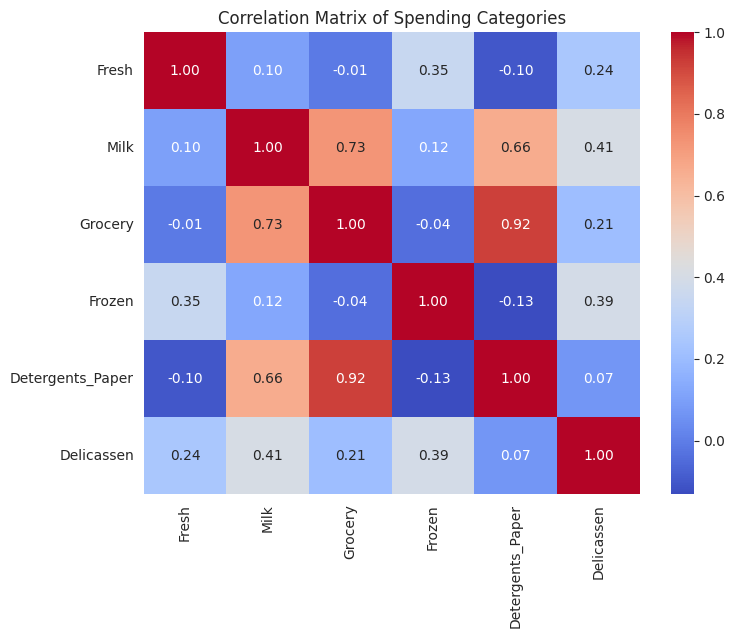

In [ ]:
# Visualize correlations (optional, but good for understanding relationships)
plt.figure(figsize=(8, 6))
sns.heatmap(df[features_for_clustering].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Spending Categories')
plt.show()

In [ ]:
# Using the Elbow Method to find the optimal number of clusters for K-Means
wcss = [] # Within-cluster sum of squares
for i in range(1, 11):
 kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
 kmeans.fit(X_scaled_df)
 wcss.append(kmeans.inertia_)

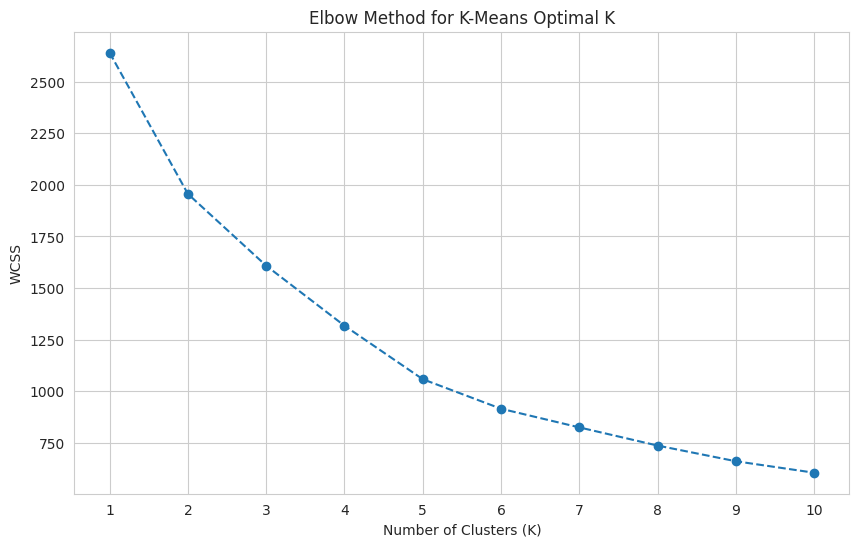

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for K-Means Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Based on the elbow plot, let's choose K=3 or K=4 (where the bend is)
# For demonstration, we'll go with K=3
optimal_k = 3

In [ ]:
# Train K-Means with the chosen optimal_k
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans_model.fit_predict(X_scaled_df)
print(f"\nK-Means Clusters (K={optimal_k}):")
print(df['KMeans_Cluster'].value_counts())


K-Means Clusters (K=3):
KMeans_Cluster
1    393
0     45
2      2
Name: count, dtype: int64


In [ ]:
# Train DBSCAN Model
# Selecting eps and min_samples might require careful tuning
# For demonstration, we'll use example values
dbscan_model = DBSCAN(eps=0.7, min_samples=5) # These values might need adjustment based on data density
df['DBSCAN_Cluster'] = dbscan_model.fit_predict(X_scaled_df)
print("\nDBSCAN Clusters:")
print(df['DBSCAN_Cluster'].value_counts()) # -1 indicates noise points


DBSCAN Clusters:
DBSCAN_Cluster
 0    343
-1     97
Name: count, dtype: int64


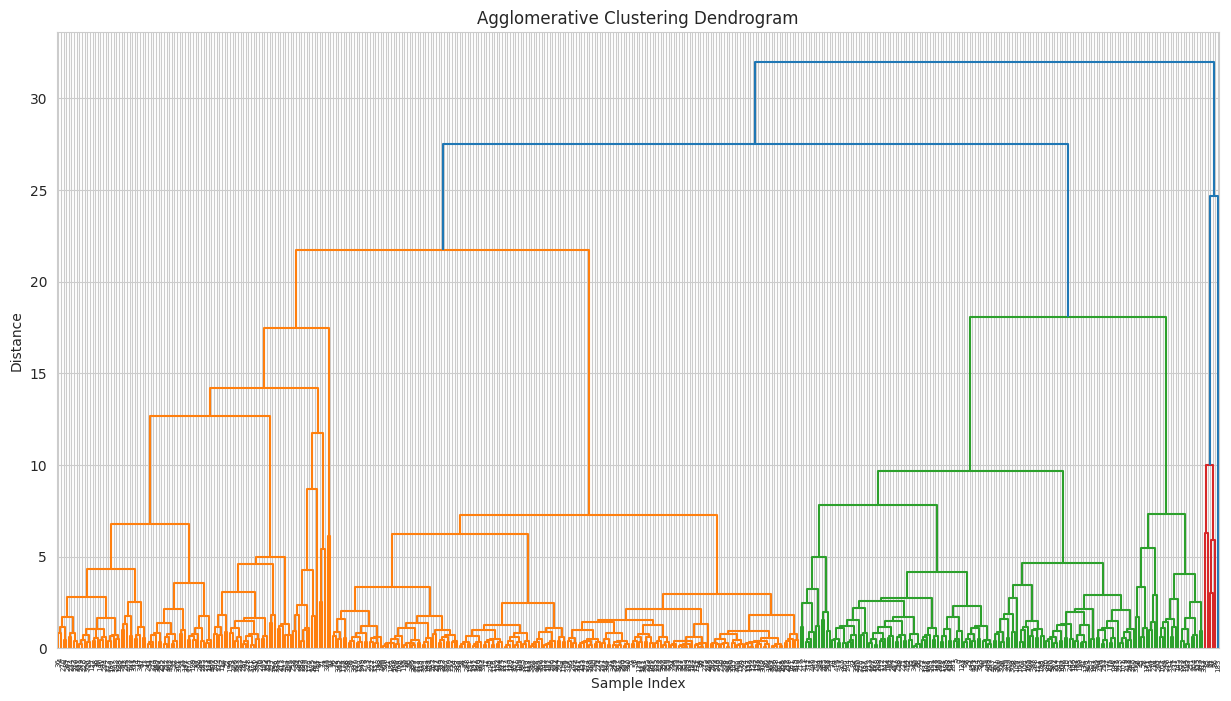

In [ ]:
# Create a linkage matrix for the dendrogram
# 'ward' linkage minimizes the variance of the clusters being merged.
linked = linkage(X_scaled_df, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linked,
 orientation='top',
 distance_sort='descending',
 show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Train Agglomerative Clustering Model
agg_cluster_model = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['Agglomerative_Cluster'] = agg_cluster_model.fit_predict(X_scaled_df)

print(f"\nAgglomerative Clusters (K={optimal_k}):")
print(df['Agglomerative_Cluster'].value_counts())


Agglomerative Clusters (K=3):
Agglomerative_Cluster
1    281
2    153
0      6
Name: count, dtype: int64


In [ ]:
# Filter out noise points for DBSCAN before calculating metrics if they are significant
# As DBSCAN can label points as -1 (noise), these should typically be excluded for metrics
# that assume all points belong to a cluster.
X_dbscan_filtered = X_scaled_df[df['DBSCAN_Cluster'] != -1]
y_dbscan_filtered = df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1]

In [ ]:
# Ensure there are at least 2 unique clusters (not just noise or one cluster) for metrics
if len(y_dbscan_filtered.unique()) >= 2:
    # K-Means Metrics
    print("\n--- Performance Metrics ---")
    print("\nK-Means Metrics:")
    print(f" Silhouette Score: {silhouette_score(X_scaled_df, df['KMeans_Cluster']):.3f}")
    print(f" Davies-Bouldin Index: {davies_bouldin_score(X_scaled_df, df['KMeans_Cluster']):.3f}")
    print(f" Calinski-Harabasz Index: {calinski_harabasz_score(X_scaled_df, df['KMeans_Cluster']):.3f}")

    # DBSCAN Metrics (on filtered data)
    print("\nDBSCAN Metrics (Excluding Noise):")
    print(f" Silhouette Score: {silhouette_score(X_dbscan_filtered, y_dbscan_filtered):.3f}")
    print(f" Davies-Bouldin Index: {davies_bouldin_score(X_dbscan_filtered, y_dbscan_filtered):.3f}")
    print(f" Calinski-Harabasz Index: {calinski_harabasz_score(X_dbscan_filtered, y_dbscan_filtered):.3f}")
else:
    print("\nDBSCAN resulted in too few clusters (or mostly noise) to calculate standard metrics.")


DBSCAN resulted in too few clusters (or mostly noise) to calculate standard metrics.


In [ ]:
# Agglomerative Clustering Metrics
print("\nAgglomerative Clustering Metrics:")
print(f" Silhouette Score: {silhouette_score(X_scaled_df, df['Agglomerative_Cluster']):.3f}")


Agglomerative Clustering Metrics:
 Silhouette Score: 0.265


In [ ]:
# Example of assigning a new data point to a K-Means cluster
# Let's say a new customer has annual spending (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen)
new_customer_spending = np.array([[10000, 5000, 3000, 2000, 1000, 500]])

In [ ]:
# Scale the new data point using the same scaler fitted on the training data
new_customer_scaled = scaler.transform(new_customer_spending)

In [ ]:
# Predict the cluster for the new customer
predicted_cluster = kmeans_model.predict(new_customer_scaled)

In [ ]:
print(f"\nNew customer spending (raw): {new_customer_spending[0]}")
print(f"New customer belongs to K-Means Cluster: {predicted_cluster[0]}")


New customer spending (raw): [10000  5000  3000  2000  1000   500]
New customer belongs to K-Means Cluster: 1


In [ ]:
# Add original spending columns back to the DataFrame along with cluster labels for analysis
df_clusters = df.copy()
df_clusters[features_for_clustering] = X_scaled_df.values # Using scaled values for consistency in analysis

In [ ]:
# Analyze K-Means Clusters
print("\n--- K-Means Cluster Analysis ---")
kmeans_cluster_profiles = df_clusters.groupby('KMeans_Cluster')[features_for_clustering].mean()
print(kmeans_cluster_profiles)


--- K-Means Cluster Analysis ---
                   Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
KMeans_Cluster                                                             
0              -0.123436  1.843487  2.181209 -0.181823          2.193481   
1               0.004957 -0.228048 -0.254553 -0.027068         -0.248890   
2               1.803356  3.332987  0.942519  9.409801         -0.446409   

                Delicassen  
KMeans_Cluster              
0                 0.301512  
1                -0.080143  
2                 8.964157  


In [ ]:
# Visualize K-Means Clusters (using original, non-scaled data for better interpretability of values)
df_display = df.copy()
df_display['KMeans_Cluster'] = df['KMeans_Cluster']

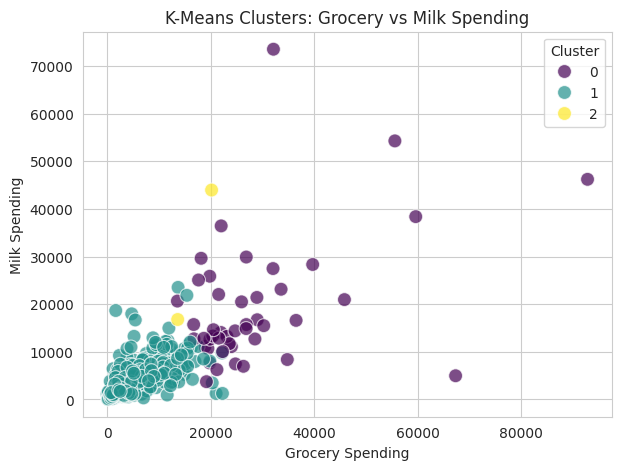

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Grocery', y='Milk', hue='KMeans_Cluster', data=df_display,
palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clusters: Grocery vs Milk Spending')
plt.xlabel('Grocery Spending')
plt.ylabel('Milk Spending')
plt.legend(title='Cluster')

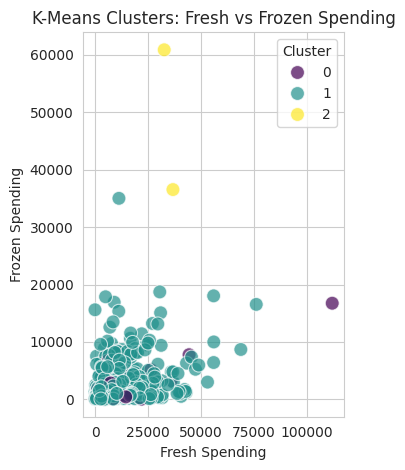

In [ ]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='Fresh', y='Frozen', hue='KMeans_Cluster', data=df_display,
palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clusters: Fresh vs Frozen Spending')
plt.xlabel('Fresh Spending')
plt.ylabel('Frozen Spending')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze Agglomerative Clusters (example)
print("\n--- Agglomerative Cluster Analysis ---")
agg_cluster_profiles = df_clusters.groupby('Agglomerative_Cluster')[features_for_clustering].mean()
print(agg_cluster_profiles)


--- Agglomerative Cluster Analysis ---
                          Fresh      Milk   Grocery    Frozen  \
Agglomerative_Cluster                                           
0                      1.225106  5.120181  4.913134  1.075185   
1                      0.241324 -0.376963 -0.438196  0.157839   
2                     -0.491259  0.491540  0.612120 -0.332051   

                       Detergents_Paper  Delicassen  
Agglomerative_Cluster                                
0                              4.648220    3.096654  
1                             -0.445883   -0.076314  
2                              0.636625    0.018722  


In [ ]:
# Analyze DBSCAN Clusters (example - excluding noise)
print("\n--- DBSCAN Cluster Analysis (Excluding Noise) ---")
dbscan_cluster_profiles = df_clusters[df_clusters['DBSCAN_Cluster'] != -
1].groupby('DBSCAN_Cluster')[features_for_clustering].mean()
print(dbscan_cluster_profiles)


--- DBSCAN Cluster Analysis (Excluding Noise) ---
                   Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
DBSCAN_Cluster                                                             
0              -0.152691 -0.260442 -0.259787 -0.172934         -0.215908   

                Delicassen  
DBSCAN_Cluster              
0                -0.186142  
